<a href="https://colab.research.google.com/github/vifirsanova/hse-python-course/blob/main/workbook/7_data_storage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Форматы хранения данных

В этом воркбуке мы познакомимся с форматами хранения данных, популярными в NLP

## TXT

Познакомимся с режимами чтения файлов

`open('filename.txt', 'r')`

| Режим | Функция |
| ----- | ------- |
| r | только чтение |
| w | запись (удаляет содержимое) |
| a | append (не удаляет содержимое) |
| r+ | чтение и запись |
| w+ | чтение, запись, создает новый файл, если его еще нет |
| a+ | чтение, дозапись, создание файла |

In [ ]:
# 'w' создает пустой файл

f = open('text.txt', 'w')

print("Мы создали пустой файл")

Мы создали пустой файл


In [ ]:
# Файл доступен только для записи, прочитать его нельзя
# UnsupportedOperation: not readable

f.read()

UnsupportedOperation: not readable

In [ ]:
# Но мы можем записать в файл информацию
# В выводе отображается длина записанной строки

f.write('This is a sample sentence')

25

In [ ]:
# Закроем файл: иначе он будет занимать память
# Откройте файл в файловой системе Colab, чтобы увидеть результат

f.close()

In [ ]:
# Повторите действия:
# 1. откройте text.txt в режиме 'w'
# 2. запишите в него любой текст
# 3. закройте файл
# 4. откройте файл в файловой системе Colab
# Напишите в комментариях, что вы заметили

### ваш код здесь ###

In [ ]:
# Повторите действия с новым режимом:
# 1. откройте text.txt в режиме 'a'
# 2. запишите в него любой текст
# 3. закройте файл
# 4. откройте файл в файловой системе Colab
# Напишите в комментариях, что вы заметили

### ваш код здесь ###

In [ ]:
# Повторите действия с новым режимом:
# 1. откройте text.txt в режиме 'r'
# 2. запишем в переменную text содержимое файла с помощью функции read (см. пример в ячейках выше)
# 3. выведем на экран содержимое переменной text

### ваш код здесь ###

This is a sample sentenceThis is a sample sentence


In [ ]:
# Попробуйте создать файл с другим именем с помощью open и режима 'r'
# Вы должны увидеть ошибку FileNotFoundError
# Напишите в комментариях, когда лучше использовать 'w', когда 'a', когда 'r'

### ваш код здесь ###

FileNotFoundError: ignored

In [ ]:
# В этой ячейке самостоятельно протестируйте режимы r+, w+, a+
# Опишите в комментариях, когда лучше использовать 'r+', 'w+' или 'a+'

### ваш код здесь ###

Метод `writelines` позволяет записывать списки

In [ ]:
# Обратите внимание на использование \ - это escape symbol, или экранирование
# Мы используем экранирование для снятия неоднозначности
# В программировании тоже есть омонимия!
# Например, когда служебный символ '' или \n совпадает с информацией в тексте
# Бэкслеш указывает на то, что символ не является служебным, это часть текста

sample_list = [
    'This another sentence.',
    'This is one more sentence.',
    'Wow, here\'s one more sentence!'
]

In [ ]:
# Откройте новый файл в режиме 'w+'
# С помощью метода write попробуйте записать список в файл
# Что произошло?

### ваш код здесь ###

TypeError: write() argument must be str, not list

In [ ]:
# Замените write на writelines, чтобы записать список
# Закройте файл
# Что вы заметили?

### ваш код здесь ###

In [ ]:
# Измените ваш код с writelines так,
# чтобы получилась структура, как на скриншоте ниже

### ваш код здесь ###

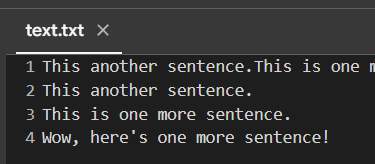

In [ ]:
# Откройте ваш файл и выведите на экран результат
# Используйте метод readlines

### ваш код здесь ###

**`with` vs `open`+`close`**

`with` позволяет работать с файлами, не закрывая их

Обработка происходит внутри конструкции `with` (как внутри цикла `for`), вне которой файл не существует

**Когда использовать `open` и `close`?**

При работе с большими данными, когда требуется построчная обработка.

**Когда использовать `with`?**

У нас небольшой файл, который нужен нам целиком.

In [ ]:
# Загрузим список стоп-слов для английского из GitHub
# Сохраним список в stopwords.txt

!wget https://gist.githubusercontent.com/sebleier/554280/raw/7e0e4a1ce04c2bb7bd41089c9821dbcf6d0c786c/NLTK\'s%2520list%2520of%2520english%2520stopwords -O stopwords.txt

--2024-07-10 10:10:59--  https://gist.githubusercontent.com/sebleier/554280/raw/7e0e4a1ce04c2bb7bd41089c9821dbcf6d0c786c/NLTK's%2520list%2520of%2520english%2520stopwords
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 622 [text/plain]
Saving to: ‘stopwords.txt’

stopwords.txt       100%[===================>]     622  --.-KB/s    in 0s      

2024-07-10 10:10:59 (35.3 MB/s) - ‘stopwords.txt’ saved [622/622]



In [ ]:
# Допустим, нам нужно посчитать количество стоп-слов в списке

stopwords = open('stopwords.txt', 'r') # открываем файл

count = 0 # создаем счетчик

while True: # цикл While

    count += 1 # считаем порядковый номер слова

    line = stopwords.readline() # выводим одну строку с readline (а не readlines - она выведет все)

    if not line: # цикл заканчивается там, где заканчиваются строки
        break

    print(f"Word number {count}: {line.strip()}") # выводим номер слова и само слово

stopwords.close() # закрываем файл

Word number 1: i
Word number 2: me
Word number 3: my
Word number 4: myself
Word number 5: we
Word number 6: our
Word number 7: ours
Word number 8: ourselves
Word number 9: you
Word number 10: your
Word number 11: yours
Word number 12: yourself
Word number 13: yourselves
Word number 14: he
Word number 15: him
Word number 16: his
Word number 17: himself
Word number 18: she
Word number 19: her
Word number 20: hers
Word number 21: herself
Word number 22: it
Word number 23: its
Word number 24: itself
Word number 25: they
Word number 26: them
Word number 27: their
Word number 28: theirs
Word number 29: themselves
Word number 30: what
Word number 31: which
Word number 32: who
Word number 33: whom
Word number 34: this
Word number 35: that
Word number 36: these
Word number 37: those
Word number 38: am
Word number 39: is
Word number 40: are
Word number 41: was
Word number 42: were
Word number 43: be
Word number 44: been
Word number 45: being
Word number 46: have
Word number 47: has
Word number 4

**Рефлексия**: для каких задач подойдет такой формат обработки?

**Подсказка**: недавно я выгружала википедию для создания нового датасета..

Напишите ответ здесь:



In [ ]:
# Стоп-слова обычно нужны нам целиком, поэтому на практике мы предпочитаем with

with open('stopwords.txt', 'r') as f:
  stopwords = f.readlines()

stopwords

# Измените этот код, чтобы ушли лишние \n

['i\n',
 'me\n',
 'my\n',
 'myself\n',
 'we\n',
 'our\n',
 'ours\n',
 'ourselves\n',
 'you\n',
 'your\n',
 'yours\n',
 'yourself\n',
 'yourselves\n',
 'he\n',
 'him\n',
 'his\n',
 'himself\n',
 'she\n',
 'her\n',
 'hers\n',
 'herself\n',
 'it\n',
 'its\n',
 'itself\n',
 'they\n',
 'them\n',
 'their\n',
 'theirs\n',
 'themselves\n',
 'what\n',
 'which\n',
 'who\n',
 'whom\n',
 'this\n',
 'that\n',
 'these\n',
 'those\n',
 'am\n',
 'is\n',
 'are\n',
 'was\n',
 'were\n',
 'be\n',
 'been\n',
 'being\n',
 'have\n',
 'has\n',
 'had\n',
 'having\n',
 'do\n',
 'does\n',
 'did\n',
 'doing\n',
 'a\n',
 'an\n',
 'the\n',
 'and\n',
 'but\n',
 'if\n',
 'or\n',
 'because\n',
 'as\n',
 'until\n',
 'while\n',
 'of\n',
 'at\n',
 'by\n',
 'for\n',
 'with\n',
 'about\n',
 'against\n',
 'between\n',
 'into\n',
 'through\n',
 'during\n',
 'before\n',
 'after\n',
 'above\n',
 'below\n',
 'to\n',
 'from\n',
 'up\n',
 'down\n',
 'in\n',
 'out\n',
 'on\n',
 'off\n',
 'over\n',
 'under\n',
 'again\n',
 'further

In [ ]:
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/extracurricular/corpus.json

--2023-10-16 08:57:25--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/extracurricular/corpus.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 263190 (257K) [text/plain]
Saving to: ‘corpus.json’

corpus.json         100%[===================>] 257.02K  --.-KB/s    in 0.005s  

2023-10-16 08:57:25 (51.0 MB/s) - ‘corpus.json’ saved [263190/263190]



## CSV

При работе с табличными данными мы предпочитаем использовать библиотеку `pandas`

Начало работы: импорт модуля `import pandas as pd`

Почему pd? По договоренности!

Это не влияет на работу модуля, но принято загружать библиотеку именно так, но именно с таким сокращением pd вы встретитесь в любой части официальной документации Pandas.

In [40]:
import pandas as pd

Табличные данные удобно хранить в формате `csv` (comma-separated values)

Для чтения таких файлов есть функция `read_csv`

Знаете ли вы преимущества `csv` перед другими форматами?
Напишите здесь:

In [42]:
# Загрузим датасет про Титаник

!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

--2024-07-10 10:32:08--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2024-07-10 10:32:08 (3.97 MB/s) - ‘titanic.csv’ saved [60302/60302]



In [43]:
# Читаем датасет
titanic = pd.read_csv("titanic.csv")

# Выводим первые 3 строки
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
# Загрузите любой csv и откройте его с помощью pd.read_csv
# Далее мы разберем работу с pandas более подробно
# Ознакомьтесь с возможностями, которые предоставляет вам Colab с Pandas:
# рекомендованные графики и разные форматы отображения таблиц;
# создайте визуал для своих данных по шаблону, сгенерированному Colab

### ваш код здесь ###

## JSON

In [44]:
# Загрузим новостной корпус в json

!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/extracurricular/corpus.json

--2024-07-10 10:38:24--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/extracurricular/corpus.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 263190 (257K) [text/plain]
Saving to: ‘corpus.json’

corpus.json         100%[===================>] 257.02K  --.-KB/s    in 0.04s   

2024-07-10 10:38:24 (6.83 MB/s) - ‘corpus.json’ saved [263190/263190]



In [45]:
# Для работы с json нужна одноименная библиотека

import json

with open("corpus.json", "r", encoding="utf8") as f:
   data = json.load(f)

In [46]:
# pprint позволяет выводить такие вложенные структуры, как json, красиво

from pprint import pprint

pprint(data[0][0])

{'body': 'Причиной раздавшегося звука взрыва в Туле, напугавшего местных '
         'жителей, стал переход самолета на сверхзвуковую скорость, об этом '
         'сообщили в ГУ МЧС по Тульской области, передает РИА Новости. Ранее '
         'ряд пабликов сообщил о звуках взрыва в российском городе. Как '
         'отмечает Telegram-канал Mash, горожане услышали его около 21:42 в '
         'Пролетарском районе, а в 21:37 в районе Заречье пропал свет из-за '
         'аварии на подстанции. «Хлопки, которые слышали жители Пролетарского '
         'округа города Тулы, предположительно, явились следствием перехода '
         'самолета на сверхзвуковую скорость», — пояснили в МЧС. В ведомстве '
         'также рассказали, что электроснабжение в Зареченском районе города '
         'восстановлено, причиной стала техническая неисправность, авария '
         'ликвидирована. Ранее в единой диспетчерской службе (ЕДДС) Тулы '
         'сообщили, что в Зареченском районе почти пять тысяч человек о

In [ ]:
# Работа с json аналогична работе со словарями в Python
# Попробуйте самостоятельно изучить структуру этого файла:
# выведите несколько заголовков из headline;
# выведите количество элементов в data[0]

### ваш код здесь ###

Скачайте еще один датасет
https://www.kaggle.com/datasets/finalepoch/medical-ner

Загрузите его в файловую систему Colab и запустите ячейки ниже, чтобы визуально изучить структуру датасета

In [ ]:
with open("Corona2.json", "r", encoding="utf8") as f:
   data = json.load(f)

In [ ]:
pprint(data['examples'][9])

{'annotations': [{'correct': None,
                  'end': 124,
                  'example_id': '9a0b1ede-2282-4dae-b086-638e45881bf5',
                  'human_annotations': [{'annotator_id': 1,
                                         'name': 'Ashpat123',
                                         'reason': 'exploration',
                                         'tagged_token_id': '19770812-2605-424f-9bc4-2d451becd837',
                                         'timestamp': '2020-03-18T10:17:37.752000Z'}],
                  'id': '19770812-2605-424f-9bc4-2d451becd837',
                  'model_annotations': [],
                  'start': 116,
                  'tag_id': '2340864c-0876-4ad1-8a34-600324a516d1',
                  'tag_name': 'Pathogen',
                  'value': 'Listeria'},
                 {'correct': None,
                  'end': 170,
                  'example_id': '9a0b1ede-2282-4dae-b086-638e45881bf5',
                  'human_annotations': [{'annotator_id': 1,
  

Такие форматы хорошо подходят для решения задач с элементами извлечения информации, автоматической разметки данных

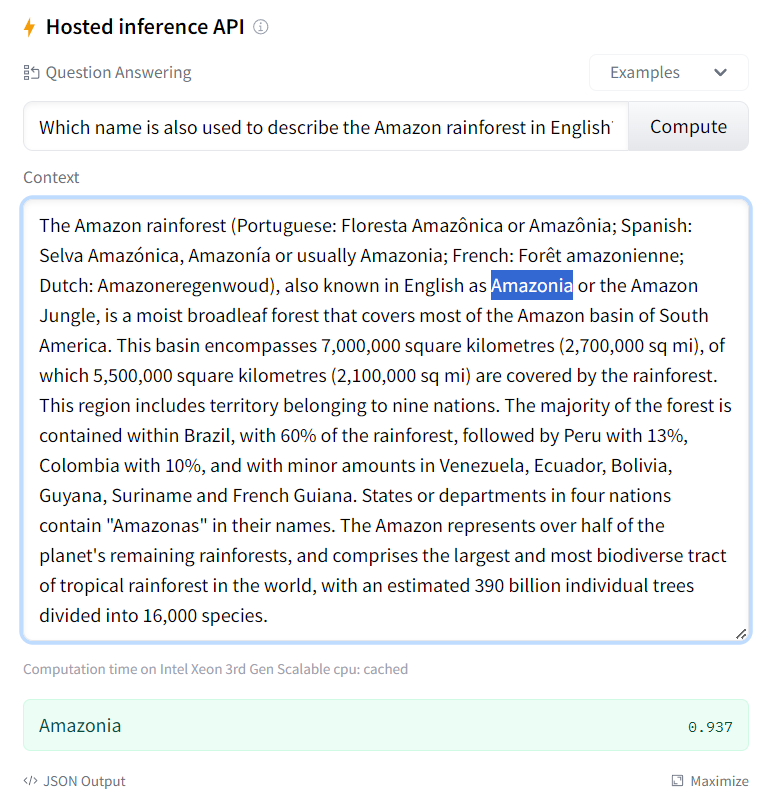

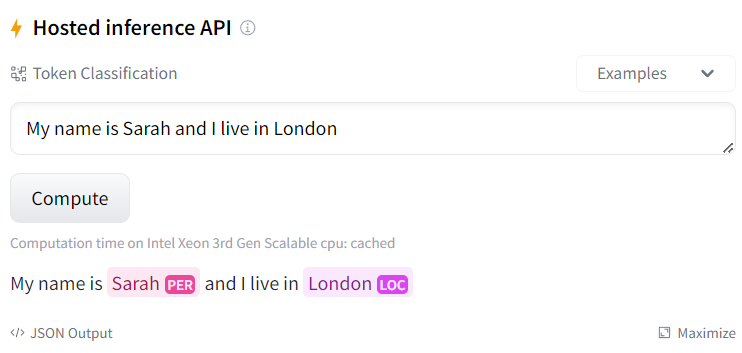

**И еще кое-что!**

Создайте свой dict() с аналогичной структурой (тематика любая!):

```
{
    "firstName": "John",
    "lastName": "Doe",
    "skills": ["C++", "ChatGPT", "Data Science"],
    "age": 45,
    "experience": [
        {
            "job": "Product Manager",
            "years": 3
        },
        {
            "job": "ML Engineer",
            "years": 4
        }
    ]
}
```

In [47]:
# Создайте файл, запишите его в переменную data

### ваш код здесь ###

In [ ]:
# Запустите ячейку, чтобы сохранить словарь в *.json

with open("your_file.json", "w") as write_file:
    json.dump(data, write_file)